BehaviorSpace results (NetLogo 6.4.0)	Table version 2.0																										
social-media-polarisation.nlogo																											
Experiment 1.0																											
11/20/2024 18:06:08:141 +0000																											
min-pxcor	max-pxcor	min-pycor	max-pycor																								
-50	50	-50	50																								

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

/var/folders/sn/m1x6z_xd7_x31ljr6tg6wkbr0000gr/T/ipykernel_53922/1120146829.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


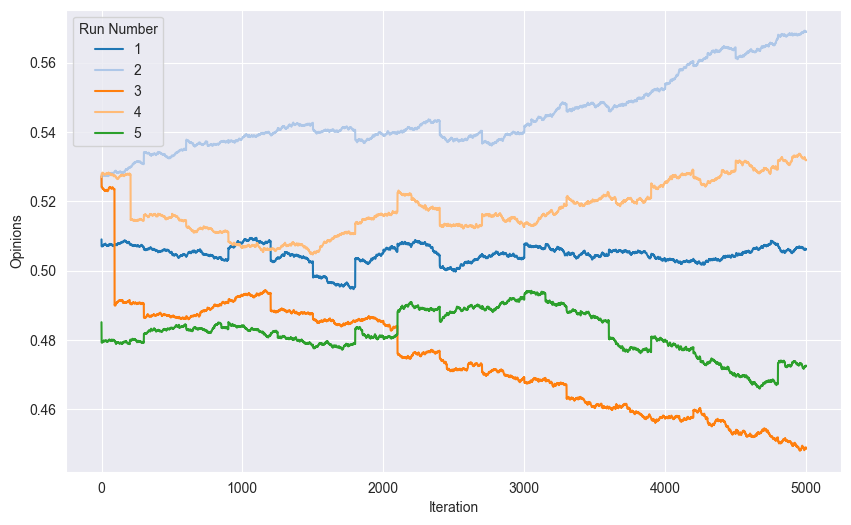

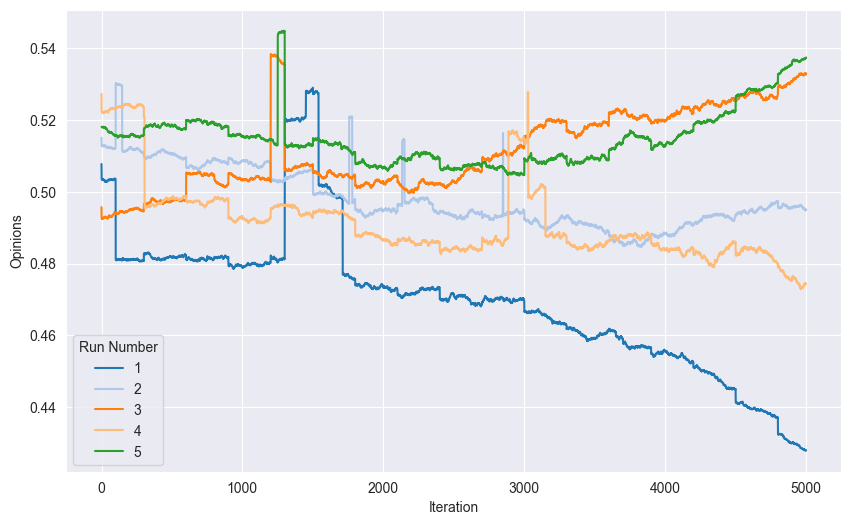

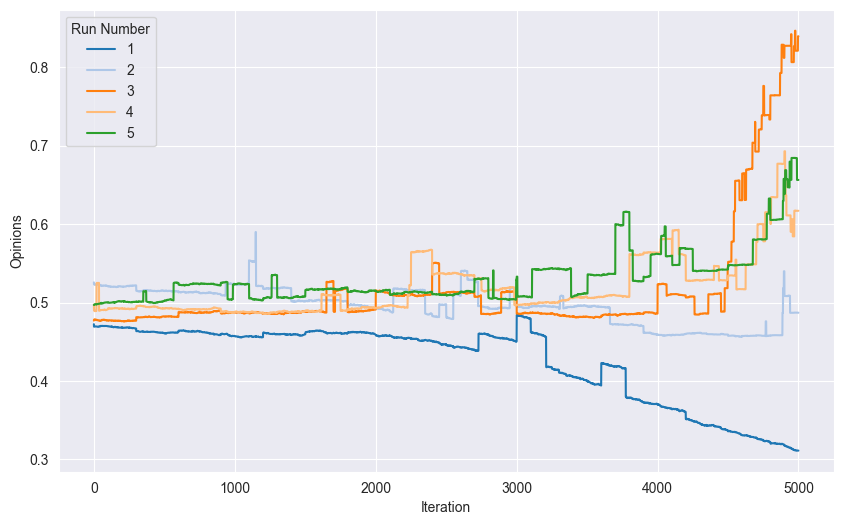

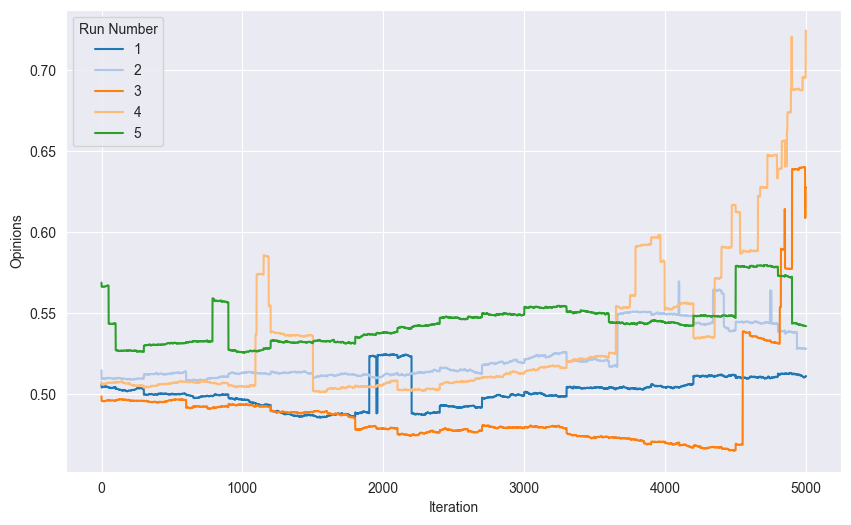

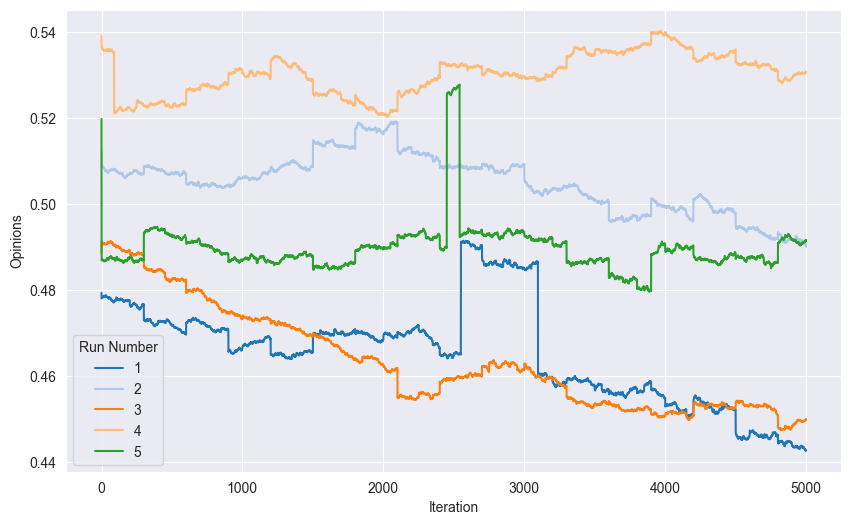

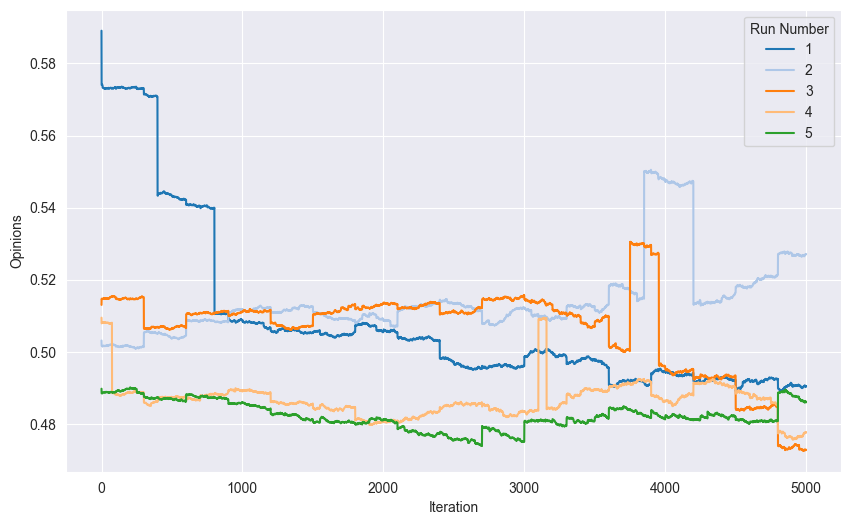

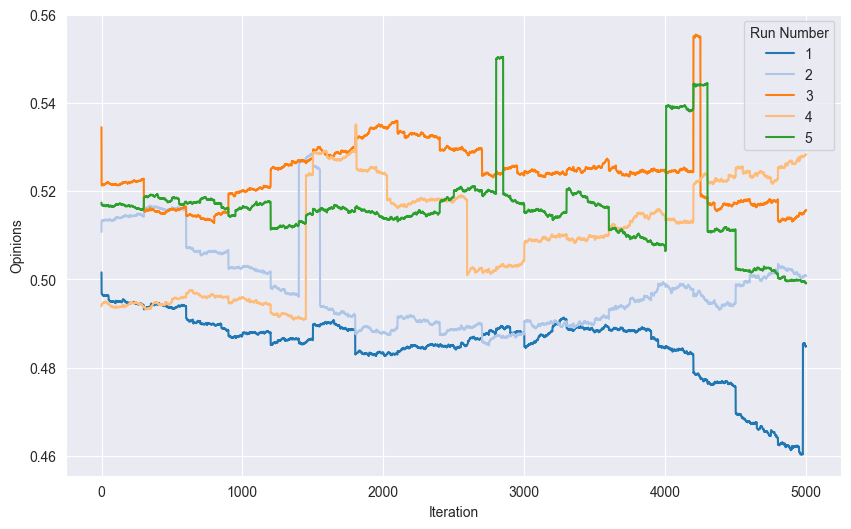

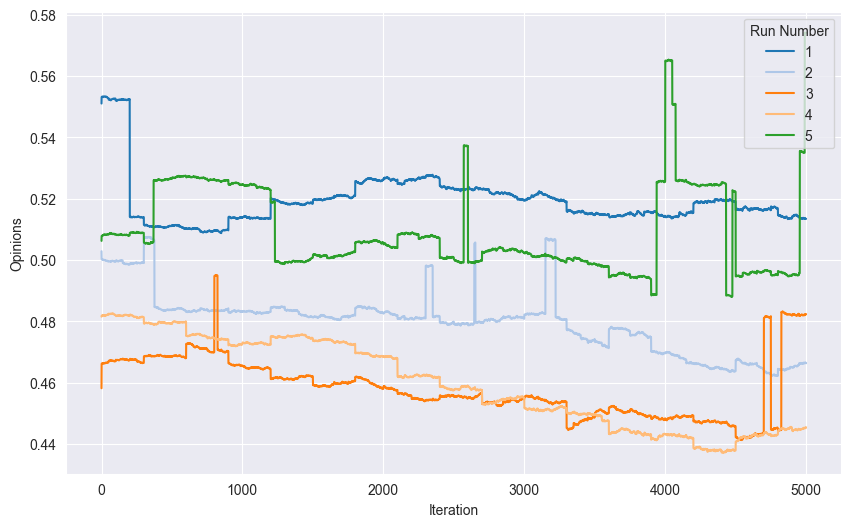

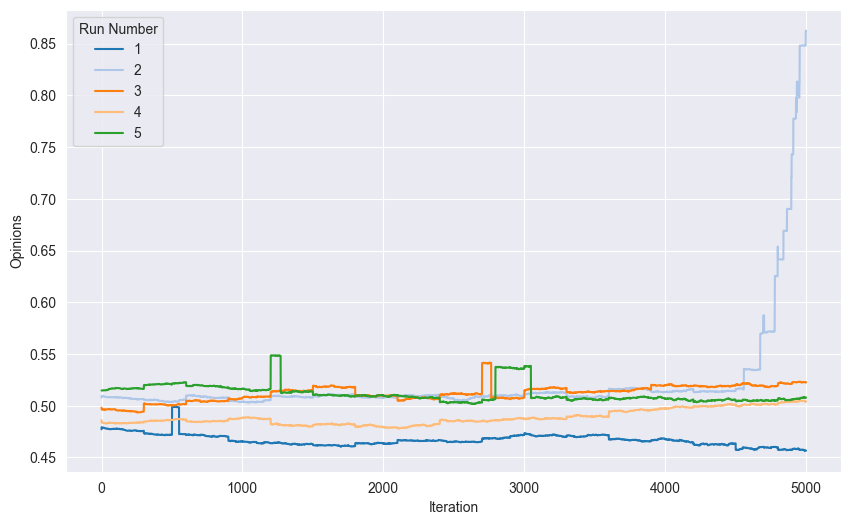

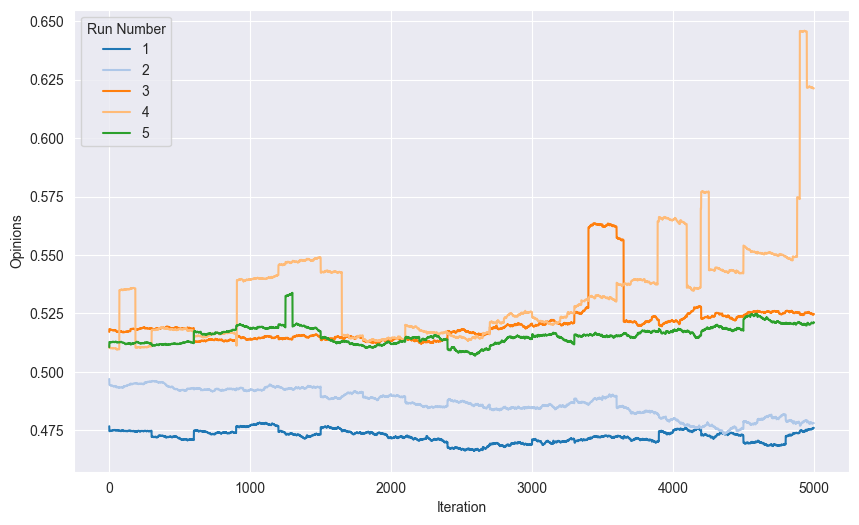

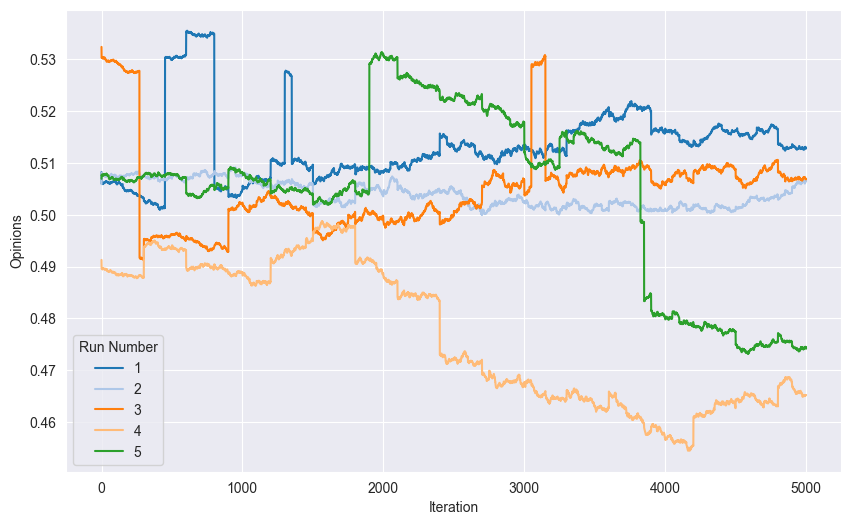

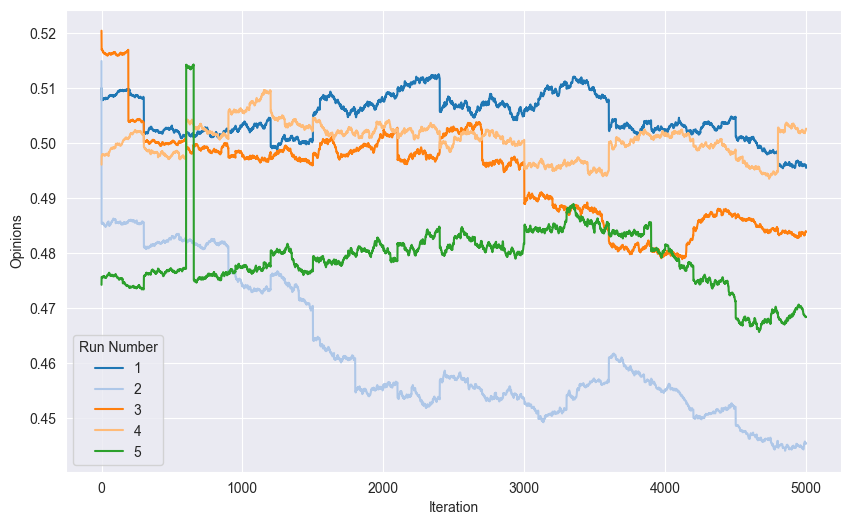

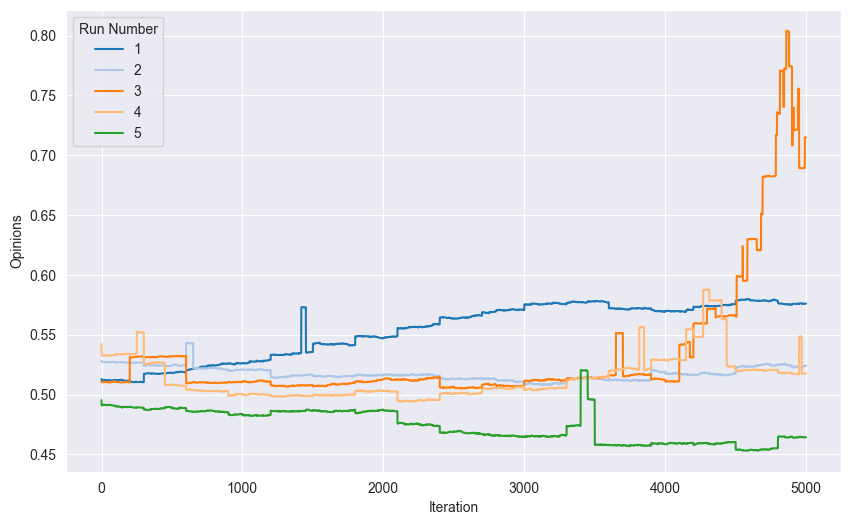

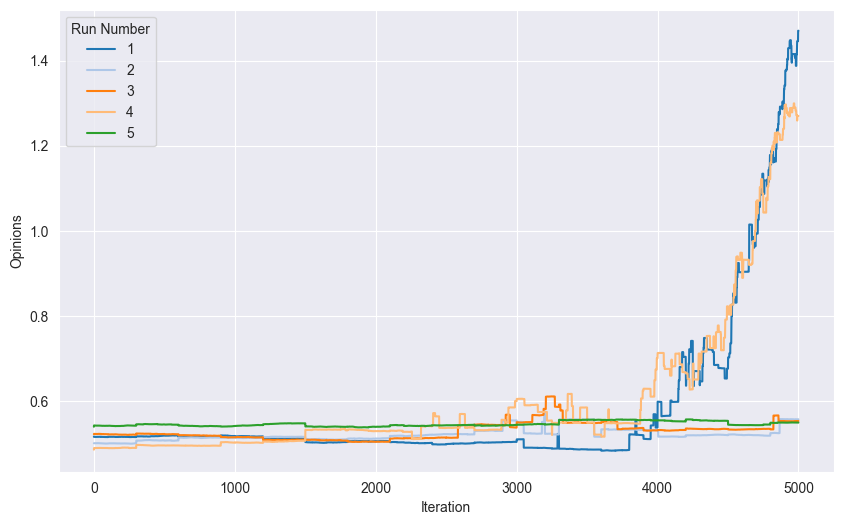

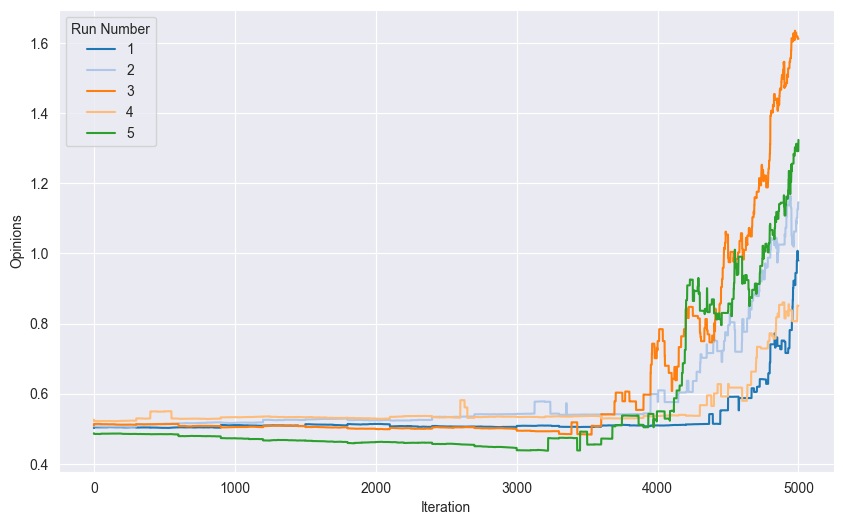

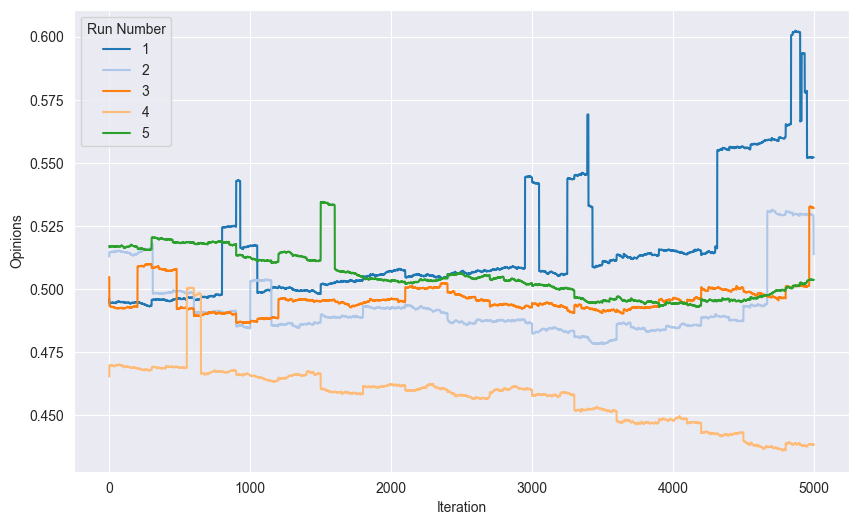

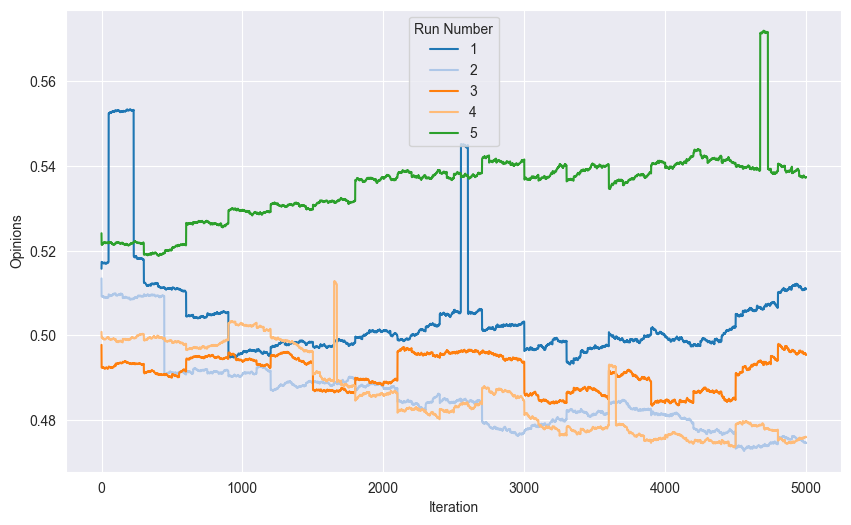

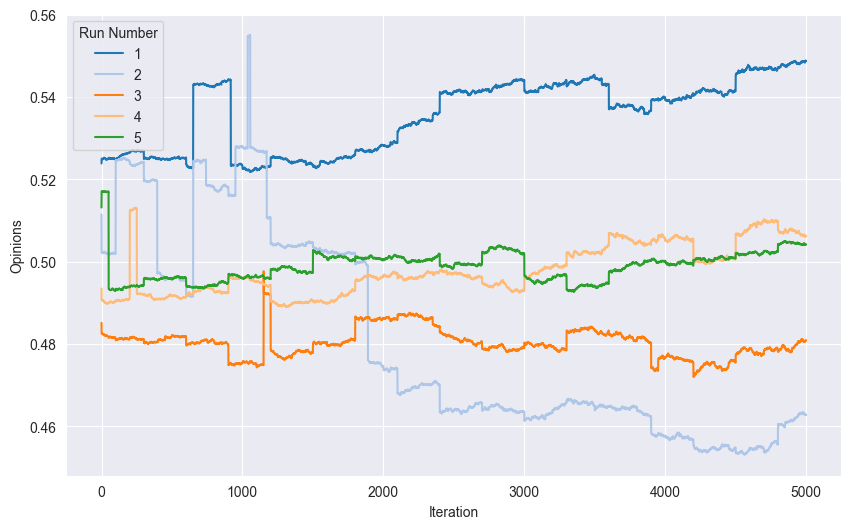

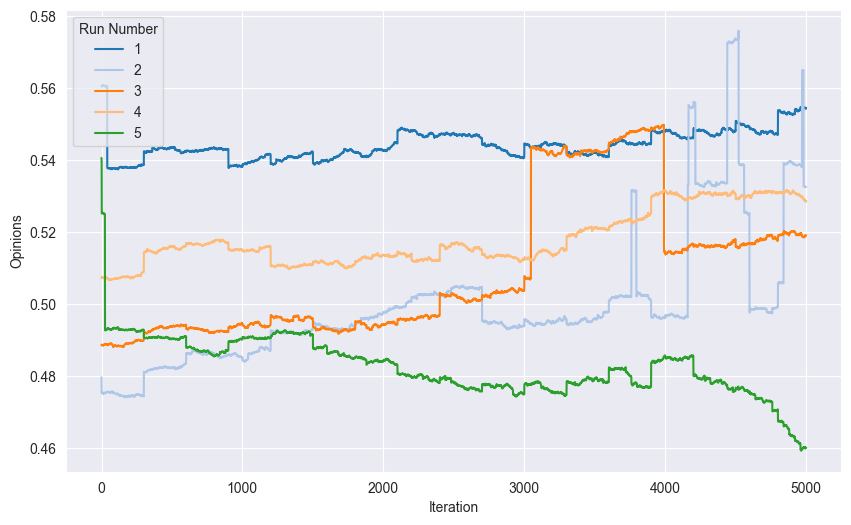

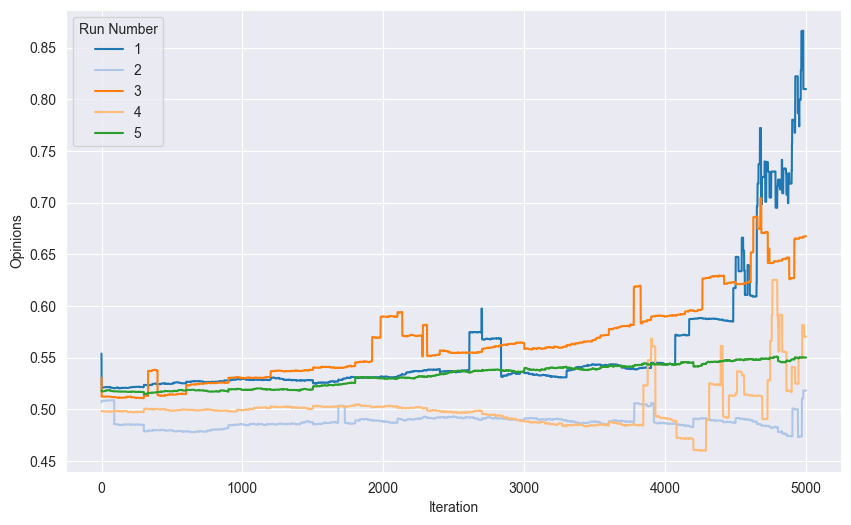

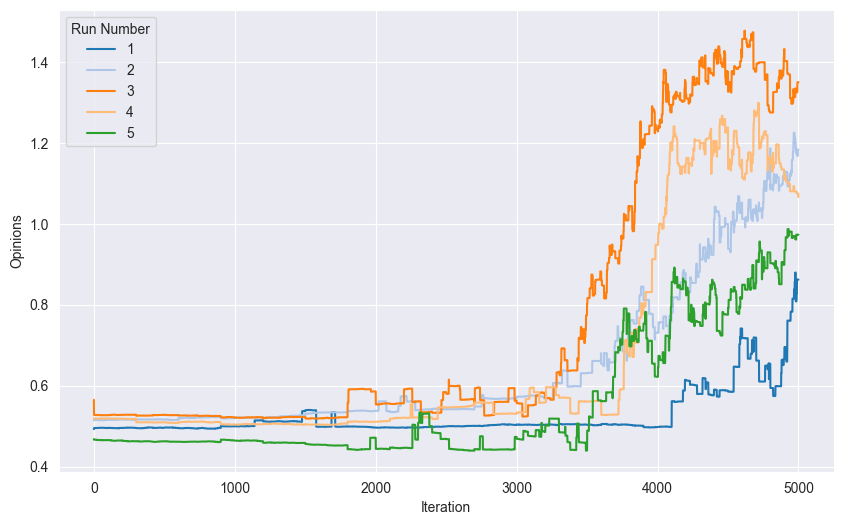

In [3]:
strs = ['1.1', '1.2', '1.3', '2.1', '2.0', '2.3', '3.1', '3.2', '3.3', '4.1', '4.2', '4.3', '5.1', '5.2', '5.3', '6.1', '6.2', '6.3', '7.1', '7.2', '7.3']

for str in strs:
    data = pd.read_csv(f'experiments/experiment {str}.csv' , skiprows=6)
    df = pd.DataFrame(data[['[opinion] of turtles', '[run number]']])
    df.rename(columns={'[opinion] of turtles': 'opinions', '[run number]': 'run'}, inplace=True)
    df['opinions'] = df['opinions'].apply(lambda x: re.findall(r"[-+]?\d*\.\d+|\d+", x))
    df['opinions'] = df['opinions'].apply(lambda x: [float(i) for i in x])
    df['run_index'] = df.groupby('run').cumcount()
    df_exploded = df.explode('opinions')
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_exploded, x='run_index', y='opinions', hue='run', palette='tab20', errorbar=None)
    # plt.title(f'Experiment {str} - Opinions of Turtles Over Iterations and Runs')
    plt.xlabel('Iteration')
    plt.ylabel('Opinions')
    plt.legend(title='Run Number')
    plt.savefig(f'plots/lines/experiment-{str}-runs.png', dpi=300)
    # plt.show()